In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('GlobalTemperaturesByCountry.csv')

# Inspect the data
print(data.head())
print(data.dtypes)


           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object


In [2]:
# Check for missing values
print(data.isnull().sum())

# remove missing values
data = data.dropna()

dt                                   0
AverageTemperature               32623
AverageTemperatureUncertainty    31884
Country                              0
dtype: int64


In [3]:
print(data.isnull().sum())

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64


In [4]:
# Convert Date column to datetime
data['dt'] = pd.to_datetime(data['dt'], errors='coerce')
print(data.dtypes)

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object


In [5]:
# Extract month from the date
data['month'] = data['dt'].dt.month

# Filter for summer and winter
summer_data = data[data['month'].isin([6, 7, 8])]
winter_data = data[data['month'].isin([12, 1, 2])]

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 1. Average Temperature for Top 5 hottest countries during summer
top5_hottest_summer = summer_data.groupby('Country').mean().nlargest(5, 'AverageTemperature')
print(top5_hottest_summer[['AverageTemperature']])


                      AverageTemperature
Country                                 
Kuwait                         35.378843
United Arab Emirates           35.163362
Qatar                          34.583214
Bahrain                        34.236202
Saudi Arabia                   33.809339


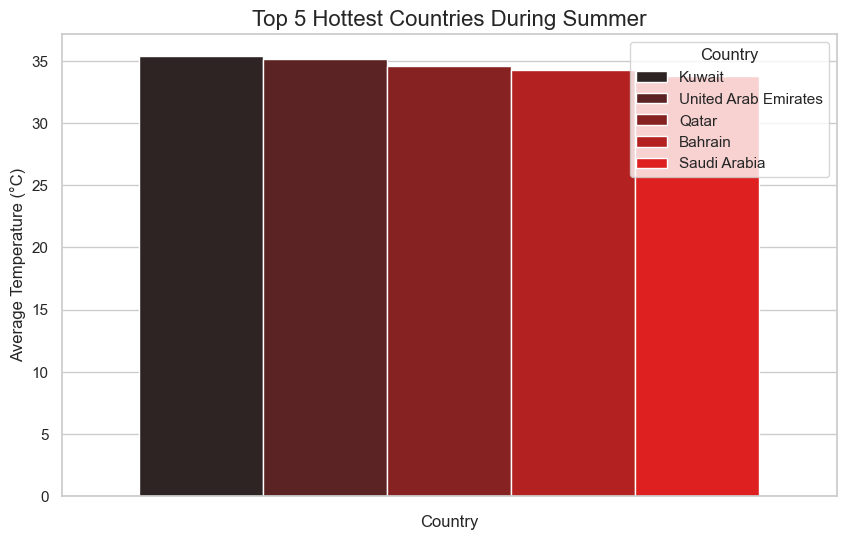

In [8]:
# Bar plot for Top 5 Hottest Countries During Summer

sns.set(style="whitegrid")
palette = sns.dark_palette("red", as_cmap=False, n_colors=5)

plt.figure(figsize=(10, 6))
sns.barplot(hue=top5_hottest_summer.index, y=top5_hottest_summer['AverageTemperature'], palette=palette)
plt.title('Top 5 Hottest Countries During Summer', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.show()


In [9]:
# 2. Average Temperature for Top 5 coldest countries during winter
top5_coldest_winter = winter_data.groupby('Country').mean().nsmallest(5, 'AverageTemperature')
print(top5_coldest_winter[['AverageTemperature']])


           AverageTemperature
Country                      
Greenland          -30.299577
Denmark            -29.678547
Russia             -24.197504
Canada             -21.691729
Mongolia           -19.846235


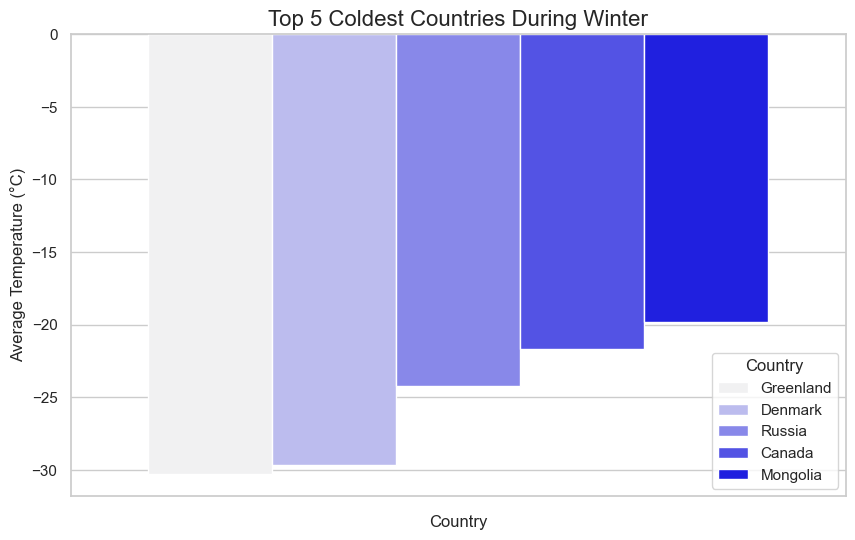

In [10]:
# Bar plot Top 5 coldest countries during winter
sns.set(style="whitegrid")
palette = sns.light_palette("blue", as_cmap=False, n_colors=5)

plt.figure(figsize=(10, 6))
sns.barplot(hue=top5_coldest_winter.index, y=top5_coldest_winter['AverageTemperature'], palette=palette)
plt.title('Top 5 Coldest Countries During Winter', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.show()

In [11]:
# 3. Country with the highest temperature uncertainty
highest_uncertainty = data.loc[data['AverageTemperatureUncertainty'].idxmax()]
print(f"Country with the highest temperature uncertainty: {highest_uncertainty['Country']},Uncertainty: {highest_uncertainty['AverageTemperatureUncertainty']}, AverageTemperature : {highest_uncertainty['AverageTemperature']}")

Country with the highest temperature uncertainty: Denmark (Europe),Uncertainty: 15.003, AverageTemperature : -3.182


In [12]:
# 4. Country with the lowest temperature uncertainty
lowest_uncertainty = data.loc[data['AverageTemperatureUncertainty'].idxmin()]
print(f"Country with the lowest temperature uncertainty: {lowest_uncertainty['Country']},Uncertainty: {lowest_uncertainty['AverageTemperatureUncertainty']}, AverageTemperature : {lowest_uncertainty['AverageTemperature']}")

Country with the lowest temperature uncertainty: Romania,Uncertainty: 0.052, AverageTemperature : 6.843


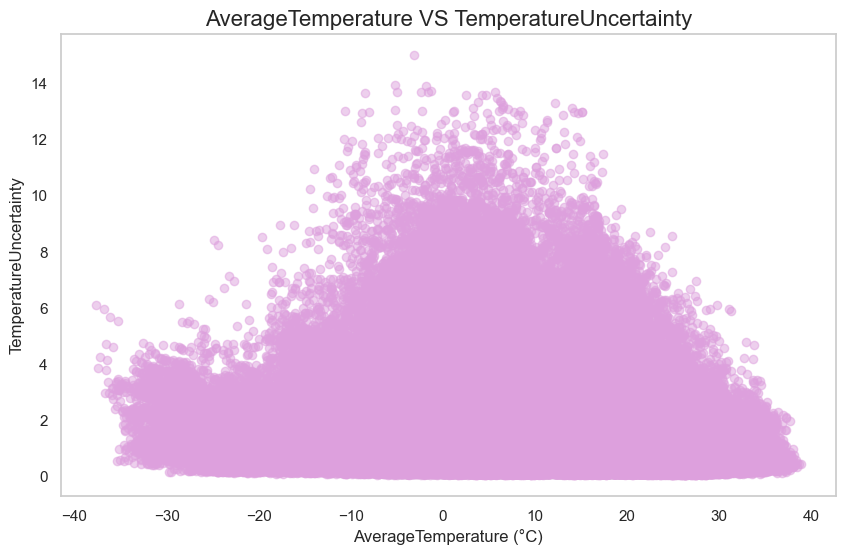

' There is no correlation between AverageTemperature and TemperatureUncertainty\nbut the Highest TemperatureUncertainty is between -10°C and 20°C. '

In [13]:
""" 5.Scatter plot for testing correlation between
AverageTemperature and TemperatureUncertainty """

plt.figure(figsize=(10, 6))
plt.scatter(data['AverageTemperature'], data['AverageTemperatureUncertainty'], color='#DDA0DD', alpha=0.5)
plt.title('AverageTemperature VS TemperatureUncertainty', fontsize=16)
plt.xlabel('AverageTemperature (°C)', fontsize=12)
plt.ylabel('TemperatureUncertainty', fontsize=12)
plt.grid()
plt.show()

""" There is no correlation between AverageTemperature and TemperatureUncertainty
but the Highest TemperatureUncertainty is between -10°C and 20°C. """

In [14]:
import re

# Filter countries that contain Europe
european_countries = data[data['Country'].str.contains(r'Europe', regex=True)]
print("European Countries Count : ", european_countries['Country'].nunique())

print("\nEuropean Countries Dataset\n", european_countries.head())

European Countries Count :  5

European Countries Dataset
                dt  AverageTemperature  AverageTemperatureUncertainty  \
139254 1743-11-01               6.507                          1.767   
139259 1744-04-01               6.026                          3.472   
139260 1744-05-01              10.413                          1.359   
139261 1744-06-01              13.630                          1.430   
139262 1744-07-01              15.755                          1.477   

                 Country  month  
139254  Denmark (Europe)     11  
139259  Denmark (Europe)      4  
139260  Denmark (Europe)      5  
139261  Denmark (Europe)      6  
139262  Denmark (Europe)      7  


In [15]:
# Clean country names by removing extra spaces and special characters
european_countries.loc[:, 'Country'] = european_countries['Country'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).strip())

print("\nAfter Removing extra spaces and special characters from Countries\n", european_countries.head())


After Removing extra spaces and special characters from Countries
                dt  AverageTemperature  AverageTemperatureUncertainty  \
139254 1743-11-01               6.507                          1.767   
139259 1744-04-01               6.026                          3.472   
139260 1744-05-01              10.413                          1.359   
139261 1744-06-01              13.630                          1.430   
139262 1744-07-01              15.755                          1.477   

               Country  month  
139254  Denmark Europe     11  
139259  Denmark Europe      4  
139260  Denmark Europe      5  
139261  Denmark Europe      6  
139262  Denmark Europe      7  


In [16]:
# Remove Europe From Country Names
european_countries.loc[:, 'Country'] = european_countries['Country'].str.replace(r'\bEurope\b', '', regex=True)

print("\nAfter Removing Europe from Countries\n", european_countries.head())


After Removing Europe from Countries
                dt  AverageTemperature  AverageTemperatureUncertainty  \
139254 1743-11-01               6.507                          1.767   
139259 1744-04-01               6.026                          3.472   
139260 1744-05-01              10.413                          1.359   
139261 1744-06-01              13.630                          1.430   
139262 1744-07-01              15.755                          1.477   

         Country  month  
139254  Denmark      11  
139259  Denmark       4  
139260  Denmark       5  
139261  Denmark       6  
139262  Denmark       7  
